# History of Lego

## 1. Introduction

Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase "leg godt", which means "play well"? Unless you speak Danish, probably not.

In this project, we will analyze a fascinating dataset on every single Lego block that has ever been built!

## 2. Reading data

A comprehensive database of lego blocks is provided by Rebrickable. The data is available as csv files and the schema is shown below.

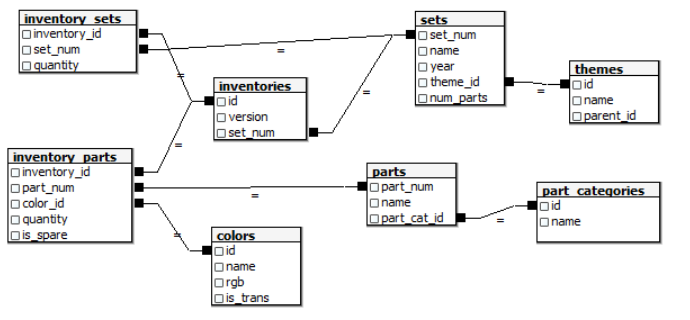


In [7]:
# Import pandas
import pandas as pd

# Read colors data
colors = pd.read_csv("colors.csv")

# Print the first few rows
print(colors.head())

   id            name     rgb is_trans
0  -1       [Unknown]  0033B2        f
1   0           Black  05131D        f
2   1            Blue  0055BF        f
3   2           Green  237841        f
4   3  Dark Turquoise  008F9B        f


## 3. Exploring colors

In [8]:
# How many distinct colors are available?
num_colors = colors.rgb.size
# Print num_colors
print("Number of colors:", num_colors)

Number of colors: 189


In [9]:
# Color description
color_des = colors.value_counts()
# Print color description
print(color_des)

id     name                          rgb     is_trans
-1     [Unknown]                     0033B2  f           1
 1004  Trans-Flame Yellowish Orange  FCB76D  t           1
 383   Chrome Silver                 E0E0E0  f           1
 450   Fabuland Brown                B67B50  f           1
 462   Medium Orange                 FFA70B  f           1
                                                        ..
 82    Metallic Gold                 DBAC34  f           1
 84    Medium Dark Flesh             CC702A  f           1
 85    Dark Purple                   3F3691  f           1
 86    Dark Flesh                    7C503A  f           1
 9999  [No Color/Any Color]          05131D  f           1
Length: 189, dtype: int64


## 4. Transparent Colors in Lego Sets
The colors data has a column named is_trans that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors

In [10]:
# colors_summary: Distribution of colors based on transparency
colors_summary = colors.groupby('is_trans').count()
print(colors_summary)

           id  name  rgb
is_trans                
f         151   151  151
t          38    38   38


## 5. Explore Lego Sets
Another interesting dataset available in this database is the sets data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained.

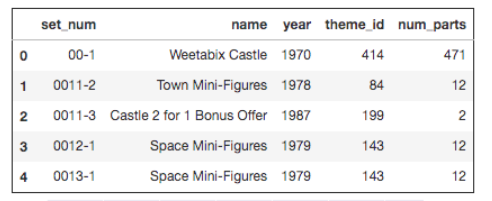

Now it's time to explore how the average number of parts in Lego sets has varied over the years.

In [11]:
sets = pd.read_csv('sets.csv')
parts_by_year = sets[['year','num_parts']].groupby('year').mean()
print(parts_by_year.head())

      num_parts
year           
1949  99.600000
1950   1.000000
1953  12.500000
1954   8.357143
1955  16.107143


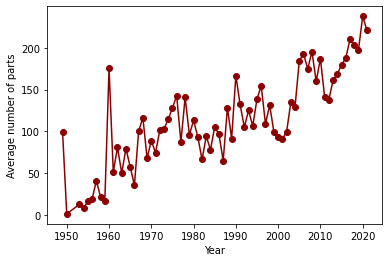

In [18]:
import matplotlib.pyplot as plt
plt.plot(parts_by_year, color='darkred', marker='o', label=True)
plt.xlabel("Year")
plt.ylabel("Average number of parts")
plt.show()

## 6. Lego Themes Over Years
Lego blocks ship under multiple themes. Let us try to get a sense of how the number of themes shipped has varied over the years.

In [44]:
# themes_by_year: Number of themes shipped by year
themes_by_year = sets.groupby('year')[['theme_id']].nunique()
# -- YOUR CODE HERE --
print(themes_by_year)

      theme_id
year          
1949         2
1950         1
1953         2
1954         2
1955         4
...        ...
2017        88
2018        94
2019        79
2020        87
2021        65

[71 rows x 1 columns]


## 7. Wrapping It All Up!

Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes. Before we wrap up, let's take a closer look at the themes_by_year DataFrame you created in the previous step.

In [45]:
# Get the number of unique themes released in 1999
num_themes = themes_by_year.loc[1999, 'theme_id']

# Print the number of unique themes released in 1999
print(num_themes)

64
